## Graphs of CPU load tests
This notebook creates the graphs of perf data collected with tool test_CPU_parallel.py  
Performance data is for testing of servers of the types: RAC52, RAC54 and RAC55.  

Servers tested in order from the oldest.  
We don't report the exact CPU model in this doc.
We omit the configuration of networking and I/O, as not relevant for these tests.  
The servers were installed with RHEL 7.9 and Oracle tests used Oracle 19c (v. 19.17).  
**RAC52:**
 - 20 physical cores (2 sockets, 10 physical cores each), 40 logical cores visible on the OS due to hyperthreading
 - CPU max freq: 2.20 GHz
 - CPU from 2016, L1 caches: 32K + 32K, L2 cache 256K, l# cache 25600K
 - RAM: DDR4, 512 GB
 
**RAC54:**
 - 8 physical cores (2 sockets, 4 physical cores each), 16 logical cores visible on the OS due to hyperthreading
 - CPU max freq: 3.80 GHz
 - CPU from 2019, L1 caches: 32K + 32K, L2 cache 1024K, L3 cache 16896K
 - RAM: DDR4, 768 GB
 
**RAC55:**
 - 16 physical cores (2 sockets, 8 physical cores each), 32 logical cores visible on the OS due to hyperthreading
 - CPU max freq: 4.2 GHz
 - CPU from 2019, L1 caches: 32K + 32K, L2 cache 512K, L3 cache 32768K
 - RAM: DDR4, 1 TB
 

In [1]:
import pandas as pd


In [2]:
PATH = "./data_tests_March2023/"

In [3]:
data = []
data.append({'key': 'RAC52', 'val': pd.read_csv(PATH + "RAC52_basic_CPU_test.csv", sep = ', ')})
data.append({'key': 'RAC54', 'val': pd.read_csv(PATH + "RAC54_basic_CPU_test.csv", sep = ', ')})
data.append({'key': 'RAC55', 'val': pd.read_csv(PATH + "RAC55_basic_CPU_test.csv", sep = ', ')})

/tmp/luca/ipykernel_2047/1737331370.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data.append({'key': 'RAC52', 'val': pd.read_csv(PATH + "RAC52_basic_CPU_test.csv", sep = ', ')})
/tmp/luca/ipykernel_2047/1737331370.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data.append({'key': 'RAC54', 'val': pd.read_csv(PATH + "RAC54_basic_CPU_test.csv", sep = ', ')})
/tmp/luca/ipykernel_2047/1737331370.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid thi

In [4]:
data[0].get('val').head()

,Num_concurrent_jobs,job_median_run_time (sec)
0,1,31.26
1,2,32.67
2,3,32.54
3,4,33.67
4,5,34.90


In [5]:
data[0].get('val').columns

Index(['Num_concurrent_jobs', 'job_median_run_time (sec)'], dtype='object')

<Figure size 640x480 with 0 Axes>

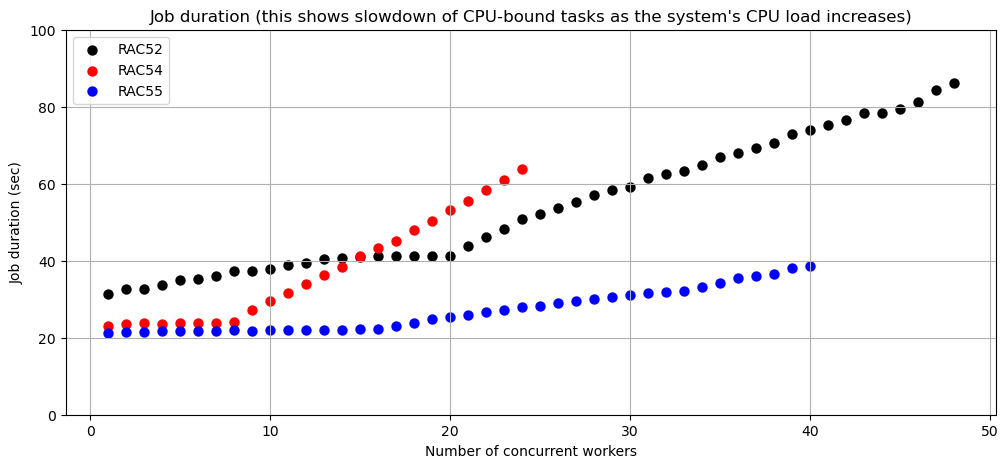

In [6]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('default')

width = 12
height = 5

node_config = {1: {'name': 'RAC52', 'linestyle': 'solid', 'color': 'black', 'alpha': 1.0, 'linewidth': 3}, 
               2: {'name': 'RAC54', 'linestyle': 'solid', 'color': 'red', 'alpha': 1.0, 'linewidth': 3}, 
               3: {'name': 'RAC55', 'linestyle': 'solid', 'color': 'blue', 'alpha': 1.0, 'linewidth': 3} 
              }

# Job duration
fig, ax = plt.subplots(figsize=(width, height))

for i, measurement in enumerate(data):
    df = measurement.get('val')
    instance = i + 1
    df.plot(kind='scatter', x='Num_concurrent_jobs', y='job_median_run_time (sec)', ax=ax, 
               linestyle=node_config[instance]['linestyle'],
               color=node_config[instance]['color'],
               alpha=node_config[instance]['alpha'],
               linewidth=node_config[instance]['linewidth'],
               label=node_config[instance]['name'])

ax.set_title("Job duration (this shows slowdown of CPU-bound tasks as the system's CPU load increases)")
ax.set_ylim([0, 100])
ax.set_xlabel('Number of concurrent workers')
ax.set_ylabel('Job duration (sec)')
# ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.axhspan(0, 30, facecolor='green', alpha=0.15)
#ax.axhspan(30, 50, facecolor='orange', alpha=0.15)
#ax.axhspan(50, 100, facecolor='red', alpha=0.15)
ax.grid()

plt.show()

In [7]:
# compute speedup


<Figure size 640x480 with 0 Axes>

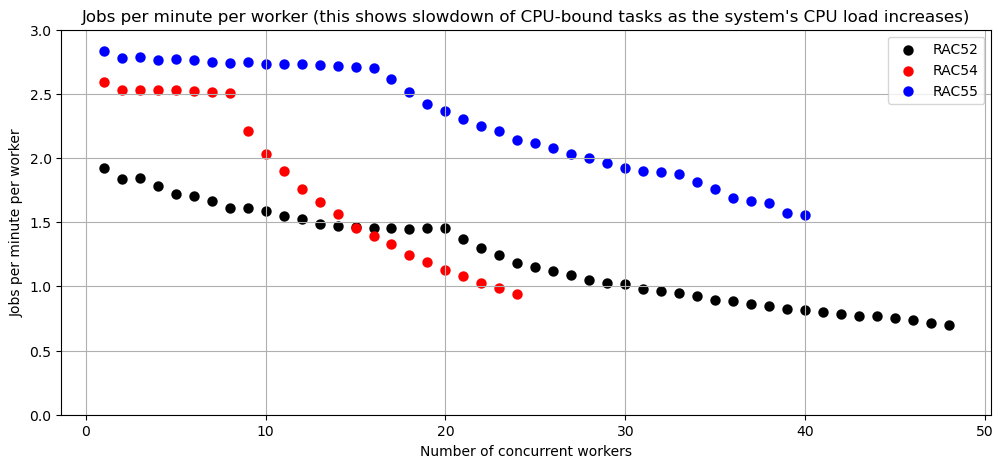

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('default')

width = 12
height = 5

node_config = {1: {'name': 'RAC52', 'linestyle': 'solid', 'color': 'black', 'alpha': 1.0, 'linewidth': 3}, 
               2: {'name': 'RAC54', 'linestyle': 'solid', 'color': 'red', 'alpha': 1.0, 'linewidth': 3}, 
               3: {'name': 'RAC55', 'linestyle': 'solid', 'color': 'blue', 'alpha': 1.0, 'linewidth': 3} 
              }

# Job duration
fig, ax = plt.subplots(figsize=(width, height))

for i, measurement in enumerate(data):
    df = measurement.get('val')
    instance = i + 1
    base = df['job_median_run_time (sec)'][0]
    df['speedup'] = 60 / df['job_median_run_time (sec)']
    df.plot(kind='scatter', x='Num_concurrent_jobs', y='speedup', ax=ax, 
               linestyle=node_config[instance]['linestyle'],
               color=node_config[instance]['color'],
               alpha=node_config[instance]['alpha'],
               linewidth=node_config[instance]['linewidth'],
               label=node_config[instance]['name'])

ax.set_title("Jobs per minute per worker (this shows slowdown of CPU-bound tasks as the system's CPU load increases)")
ax.set_ylim([0, 3])
ax.set_xlabel('Number of concurrent workers')
ax.set_ylabel('Jobs per minute per worker')
# ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.axhspan(0, 30, facecolor='green', alpha=0.15)
#ax.axhspan(30, 50, facecolor='orange', alpha=0.15)
#ax.axhspan(50, 100, facecolor='red', alpha=0.15)
ax.grid()

plt.show()

<Figure size 640x480 with 0 Axes>

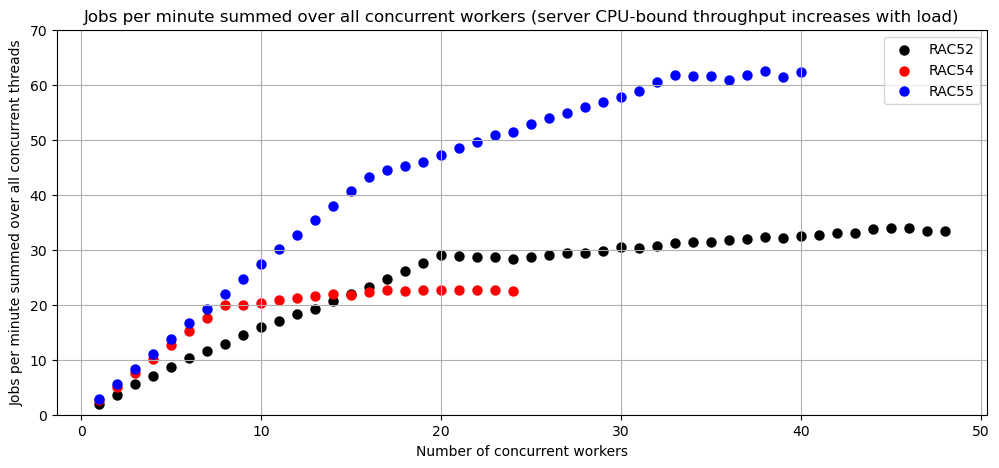

In [9]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('default')

width = 12
height = 5

node_config = {1: {'name': 'RAC52', 'linestyle': 'solid', 'color': 'black', 'alpha': 1.0, 'linewidth': 3}, 
               2: {'name': 'RAC54', 'linestyle': 'solid', 'color': 'red', 'alpha': 1.0, 'linewidth': 3}, 
               3: {'name': 'RAC55', 'linestyle': 'solid', 'color': 'blue', 'alpha': 1.0, 'linewidth': 3} 
              }

# Job duration
fig, ax = plt.subplots(figsize=(width, height))

for i, measurement in enumerate(data):
    df = measurement.get('val')
    instance = i + 1
    base = df['job_median_run_time (sec)'][0]
    df['speedup'] = 60*  df['Num_concurrent_jobs'] / df['job_median_run_time (sec)']
    df.plot(kind='scatter', x='Num_concurrent_jobs', y='speedup', ax=ax, 
               linestyle=node_config[instance]['linestyle'],
               color=node_config[instance]['color'],
               alpha=node_config[instance]['alpha'],
               linewidth=node_config[instance]['linewidth'],
               label=node_config[instance]['name'])

ax.set_title('Jobs per minute summed over all concurrent workers (server CPU-bound throughput increases with load)')
ax.set_ylim([0, 70])
ax.set_xlabel('Number of concurrent workers')
ax.set_ylabel('Jobs per minute summed over all concurrent threads')
# ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.axhspan(0, 30, facecolor='green', alpha=0.15)
#ax.axhspan(30, 50, facecolor='orange', alpha=0.15)
#ax.axhspan(50, 100, facecolor='red', alpha=0.15)
ax.grid()

plt.show()

<Figure size 640x480 with 0 Axes>

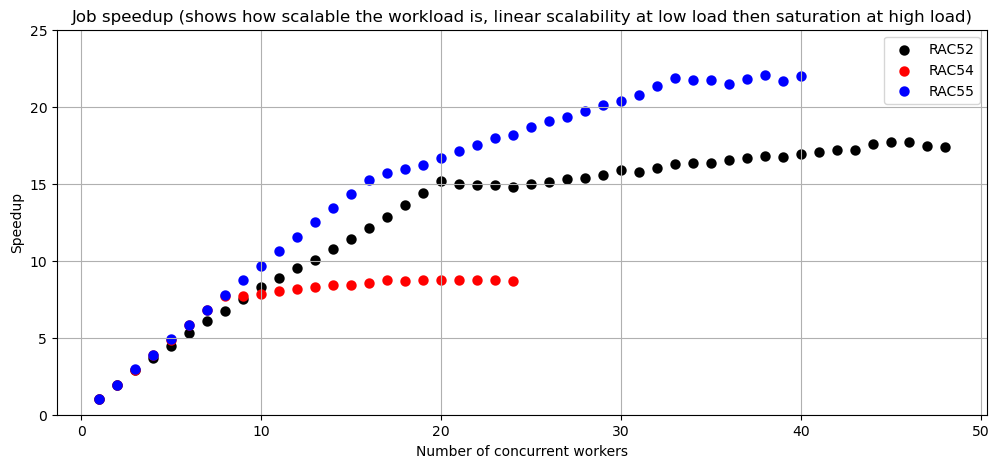

In [10]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('default')

width = 12
height = 5

node_config = {1: {'name': 'RAC52', 'linestyle': 'solid', 'color': 'black', 'alpha': 1.0, 'linewidth': 3}, 
               2: {'name': 'RAC54', 'linestyle': 'solid', 'color': 'red', 'alpha': 1.0, 'linewidth': 3}, 
               3: {'name': 'RAC55', 'linestyle': 'solid', 'color': 'blue', 'alpha': 1.0, 'linewidth': 3} 
              }

# Job duration
fig, ax = plt.subplots(figsize=(width, height))

for i, measurement in enumerate(data):
    df = measurement.get('val')
    instance = i + 1
    base = df['job_median_run_time (sec)'][0]
    df['speedup'] = df['Num_concurrent_jobs'] * base / df['job_median_run_time (sec)']
    df.plot(kind='scatter', x='Num_concurrent_jobs', y='speedup', ax=ax, 
               linestyle=node_config[instance]['linestyle'],
               color=node_config[instance]['color'],
               alpha=node_config[instance]['alpha'],
               linewidth=node_config[instance]['linewidth'],
               label=node_config[instance]['name'])

ax.set_title('Job speedup (shows how scalable the workload is, linear scalability at low load then saturation at high load)')
ax.set_ylim([0, 25])
ax.set_xlabel('Number of concurrent workers')
ax.set_ylabel('Speedup')
# ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.axhspan(0, 30, facecolor='green', alpha=0.15)
#ax.axhspan(30, 50, facecolor='orange', alpha=0.15)
#ax.axhspan(50, 100, facecolor='red', alpha=0.15)
ax.grid()

plt.show()